# Introduction to NN

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from skimage.io import imread

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Input,Dense


In [301]:
tf.__version__

'2.5.0'

In [302]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [303]:
BASE_DIR = 'notMNIST_small/'
MAX_N_IMAGES = 200

In [304]:
image_classes = os.listdir(BASE_DIR)

In [305]:
directories = [os.path.join(BASE_DIR,image_class) for image_class in image_classes]


In [306]:
all_images = []
all_classes = []

for image_class,directory in zip(image_classes,directories):
    images = os.listdir(directory)[:MAX_N_IMAGES]
    full_paths = [os.path.join(directory,image_path) for image_path in images]
    all_images += [imread(img) for img in full_paths]
    all_classes += [image_class]*MAX_N_IMAGES 
   

In [307]:
all_images = np.array(all_images)

In [308]:
all_classes = np.array(all_classes)

Text(0.5, 1.0, 'A')

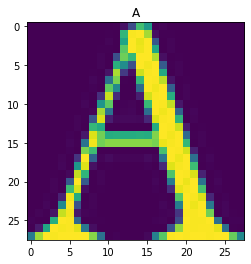

In [309]:
plt.imshow(all_images[42])
plt.title(all_classes[42])

In [310]:
all_images.min(),all_images.max()

(0, 255)

In [311]:
all_images_scaled = all_images/ 255.0

In [312]:
train_images,test_images,train_classes,test_classes = train_test_split(all_images_scaled,all_classes,test_size = 500,stratify = all_classes)

In [313]:
train_images.shape

(1500, 28, 28)

In [314]:
test_images.shape

(500, 28, 28)

In [315]:
pd.Series(all_classes).value_counts()

D    200
F    200
E    200
C    200
A    200
H    200
J    200
B    200
G    200
I    200
dtype: int64

In [316]:
pd.Series(train_classes).value_counts()

D    150
F    150
E    150
C    150
A    150
H    150
J    150
B    150
G    150
I    150
dtype: int64

In [317]:
pd.Series(test_classes).value_counts()

D    50
F    50
C    50
B    50
A    50
H    50
G    50
E    50
J    50
I    50
dtype: int64

In [318]:
train_images_vectors = train_images.reshape(len(train_images),-1)
test_images_vectors = test_images.reshape(len(test_images),-1)

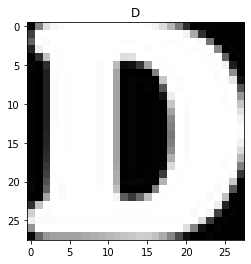

In [319]:
plt.imshow(train_images_vectors[30].reshape(28,28),cmap = "gray")
plt.title(train_classes[30])
plt.show()

In [320]:
neural_network = MLPClassifier(
    hidden_layer_sizes=(10,),verbose = True
)

In [321]:
neural_network.fit(train_images_vectors,train_classes)

Iteration 1, loss = 2.29291306
Iteration 2, loss = 1.98248047
Iteration 3, loss = 1.77816484
Iteration 4, loss = 1.62073479
Iteration 5, loss = 1.49263706
Iteration 6, loss = 1.38998175
Iteration 7, loss = 1.30556608
Iteration 8, loss = 1.23249503
Iteration 9, loss = 1.17517480
Iteration 10, loss = 1.11928717
Iteration 11, loss = 1.07154533
Iteration 12, loss = 1.02917756
Iteration 13, loss = 0.98608870
Iteration 14, loss = 0.94634248
Iteration 15, loss = 0.90917700
Iteration 16, loss = 0.87344398
Iteration 17, loss = 0.83898974
Iteration 18, loss = 0.80888626
Iteration 19, loss = 0.77472350
Iteration 20, loss = 0.74370472
Iteration 21, loss = 0.71621569
Iteration 22, loss = 0.68952578
Iteration 23, loss = 0.66109170
Iteration 24, loss = 0.63685488
Iteration 25, loss = 0.61355366
Iteration 26, loss = 0.59381708
Iteration 27, loss = 0.57577199
Iteration 28, loss = 0.55784458
Iteration 29, loss = 0.54326327
Iteration 30, loss = 0.52815231
Iteration 31, loss = 0.50882812
Iteration 32, los

c:\Users\as\anaconda3\envs\baseREC\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), verbose=True)

In [322]:
# how good we overfitted 
neural_network.score(train_images_vectors,train_classes)

0.9813333333333333

In [323]:
neural_network.score(test_images_vectors,test_classes)

0.892

more data increase the accuracy and decrease the bias! \
before increasing the number of the images we had high variance of the data

In [324]:
neural_network.coefs_[0].shape

(784, 10)

In [325]:
neural_network.coefs_[1].shape
# thesea are the coefs of the gradient descent


(10, 10)

In [326]:
neural_network = MLPClassifier(
    hidden_layer_sizes=(5,5),
    verbose = True,
    max_iter = 2000
)

In [327]:
neural_network.fit(train_images_vectors,train_classes)

Iteration 1, loss = 2.36428497
Iteration 2, loss = 2.29731845
Iteration 3, loss = 2.24314450
Iteration 4, loss = 2.19122815
Iteration 5, loss = 2.12360592
Iteration 6, loss = 2.04074877
Iteration 7, loss = 1.97137658
Iteration 8, loss = 1.91020065
Iteration 9, loss = 1.85595429
Iteration 10, loss = 1.80385271
Iteration 11, loss = 1.76383004
Iteration 12, loss = 1.71713181
Iteration 13, loss = 1.67761995
Iteration 14, loss = 1.63852911
Iteration 15, loss = 1.60485478
Iteration 16, loss = 1.56780290
Iteration 17, loss = 1.53158209
Iteration 18, loss = 1.49493237
Iteration 19, loss = 1.45476715
Iteration 20, loss = 1.41575843
Iteration 21, loss = 1.38235839
Iteration 22, loss = 1.35577316
Iteration 23, loss = 1.32163382
Iteration 24, loss = 1.29382606
Iteration 25, loss = 1.26549996
Iteration 26, loss = 1.23888381
Iteration 27, loss = 1.21397159
Iteration 28, loss = 1.18902205
Iteration 29, loss = 1.16309891
Iteration 30, loss = 1.14286386
Iteration 31, loss = 1.11999615
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=2000, verbose=True)

In [328]:
neural_network.score(train_images_vectors,train_classes)

0.9973333333333333

In [329]:
neural_network.score(test_images_vectors,test_classes)

0.832

In [330]:
INPUT_DIM = train_images_vectors.shape[1]
NUM_CLASSES = len(image_classes)


In [331]:
train_classes

array(['A', 'F', 'A', ..., 'F', 'H', 'I'], dtype='<U1')

In [332]:
train_classes = [ord(c) - ord("A") for c in train_classes]
test_classes = [ord(c) - ord("A") for c in test_classes]

In [333]:
tf.keras.backend.clear_session()

In [334]:
keras_nn = Sequential([
    Input(INPUT_DIM),
    Dense(12,activation= "relu", kernel_regularizer=L2(0.0001) ),
    Dense(NUM_CLASSES,activation="softmax")
])

In [335]:
keras_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                9420      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
Total params: 9,550
Trainable params: 9,550
Non-trainable params: 0
_________________________________________________________________


In [336]:
keras_nn.compile(loss = "sparse_categorical_crossentropy" , optimizer="adam",metrics = ["accuracy"])

In [337]:
keras_nn.fit(train_images_vectors, np.array(train_classes),
    epochs = 500,
    validation_split=0.1,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor =  "val_accuracy", min_delta = 0.001, patience = 5)]
)

Epoch 1/500
43/43 [==============================] - 1s 7ms/step - loss: 1.8030 - accuracy: 0.3667 - val_loss: 1.4468 - val_accuracy: 0.4867
Epoch 2/500
43/43 [==============================] - 0s 2ms/step - loss: 1.2257 - accuracy: 0.6356 - val_loss: 1.0595 - val_accuracy: 0.7133
Epoch 3/500
43/43 [==============================] - 0s 2ms/step - loss: 0.9165 - accuracy: 0.7704 - val_loss: 0.9001 - val_accuracy: 0.7800
Epoch 4/500
43/43 [==============================] - 0s 2ms/step - loss: 0.7347 - accuracy: 0.8304 - val_loss: 0.7856 - val_accuracy: 0.7933
Epoch 5/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6210 - accuracy: 0.8430 - val_loss: 0.6754 - val_accuracy: 0.7933
Epoch 6/500
43/43 [==============================] - 0s 3ms/step - loss: 0.5434 - accuracy: 0.8763 - val_loss: 0.6649 - val_accuracy: 0.8000
Epoch 7/500
43/43 [==============================] - 0s 3ms/step - loss: 0.4988 - accuracy: 0.8785 - val_loss: 0.6082 - val_accuracy: 0.8267
Epoch 8/500
4

In [338]:
keras_nn.evaluate(train_images_vectors,np.array(train_classes))

47/47 [==============================] - 0s 1ms/step - loss: 0.2601 - accuracy: 0.9433


[0.26005566120147705, 0.9433333277702332]

In [339]:
keras_nn.evaluate(test_images_vectors,np.array(test_classes))

16/16 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.8840


[0.4723193943500519, 0.8840000033378601]